In [34]:
# Import base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bnlearn as bn
import os

### Basic causal graph with no priors

In [35]:
# Imprt specific libraries
import bnlearn as bn

In [36]:
# Get data to play with
df = pd.read_csv('DataSets/churn_modelling.csv')

In [37]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [38]:
# Take a subset because creatignna causal netowkr with 14 variables is long
cas_sub_df = df[['Geography',
                 'Gender',
                 'Age',
                 'NumOfProducts',
                 'Exited']]

In [39]:
bn_model = bn.structure_learning.fit(cas_sub_df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


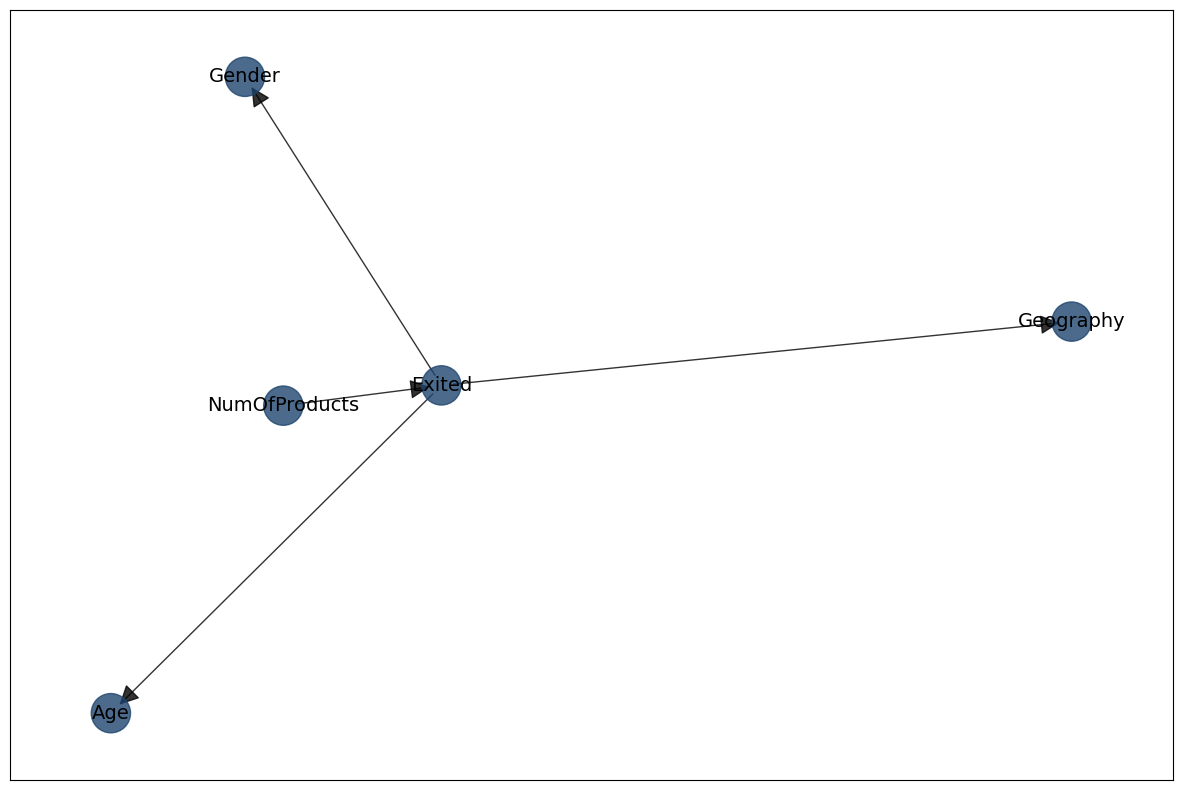

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Geography': array([0.81326336, 0.17716141]),
  'Gender': array([-0.23526421,  0.91298394]),
  'Age': array([-0.40533064, -1.        ]),
  'NumOfProducts': array([-0.18658826, -0.07552797]),
  'Exited': array([ 0.01391975, -0.01461738])},
 'G': <networkx.classes.digraph.DiGraph at 0x25bc084a1d0>,
 'node_properties': {'Geography': {'node_color': '#1f456e', 'node_size': 800},
  'Gender': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'NumOfProducts': {'node_color': '#1f456e', 'node_size': 800},
  'Exited': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('NumOfProducts', 'Exited'): {'color': '#000000',
   'weight': 1},
  ('Exited', 'Geography'): {'color': '#000000', 'weight': 1},
  ('Exited', 'Gender'): {'color': '#000000', 'weight': 1},
  ('Exited', 'Age'): {'color': '#000000', 'weight': 1}}}

In [40]:
bn.plot(bn_model,
        interactive=False)

In [41]:
model_it = bn.independence_test(bn_model,
                                cas_sub_df,
                                test="chi_square",
                                alpha=0.05,
                                prune=True)

[bnlearn] >Compute edge strength with [chi_square]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


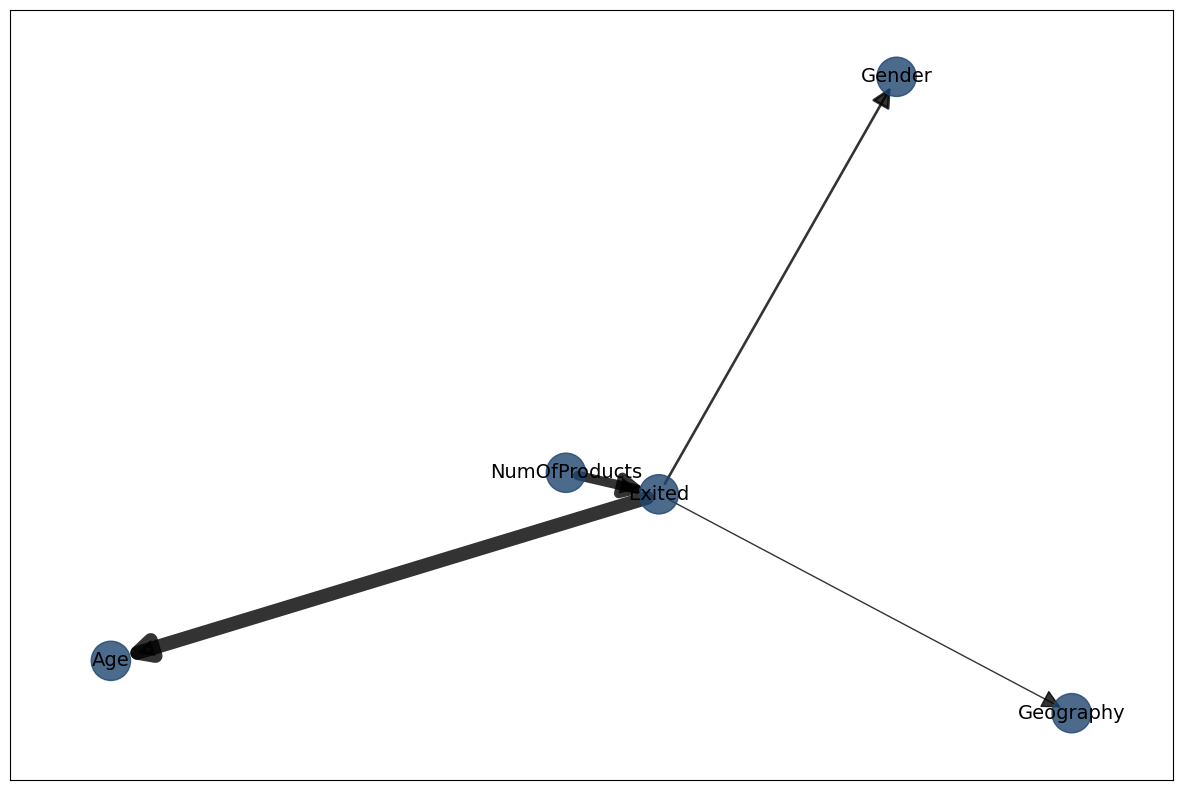

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Geography': array([ 0.74714384, -0.41435281]),
  'Gender': array([0.42886342, 0.73404746]),
  'Age': array([-1.        , -0.31990261]),
  'NumOfProducts': array([-0.17246943,  0.01952292]),
  'Exited': array([-0.00353783, -0.01931496])},
 'G': <networkx.classes.digraph.DiGraph at 0x25bc0a5e990>,
 'node_properties': {'Geography': {'node_color': '#1f456e', 'node_size': 800},
  'Gender': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'NumOfProducts': {'node_color': '#1f456e', 'node_size': 800},
  'Exited': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Exited', 'Age'): {'color': '#000000',
   'weight': 6.811634828810094},
  ('Exited', 'Gender'): {'color': '#000000', 'weight': 1.0},
  ('Exited', 'Geography'): {'color': '#000000', 'weight': 1.8762053841657842},
  ('NumOfProducts', 'Exited'): {'color': '#000000', 'weigh

In [42]:
bn.plot(model_it)

In [43]:
model_par = bn.parameter_learning.fit(model_it, cas_sub_df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of NumOfProducts:
+------------------+-----------+
| NumOfProducts(1) | 0.484909  |
+------------------+-----------+
| NumOfProducts(2) | 0.44      |
+------------------+-----------+
| NumOfProducts(3) | 0.0469091 |
+------------------+-----------+
| NumOfProducts(4) | 0.0281818 |
+------------------+-----------+
[bnlearn] >CPD of Exited:
+---------------+-----+--------------------+
| NumOfProducts | ... | NumOfProducts(4)   |
+---------------+-----+--------------------+
| Exited(0)     | ... | 0.4032258064516129 |
+---------------+-----+--------------------+
| Exited(1)     | ... | 0.5967741935483871 |
+---------------+-----+--------------------+
[bnlearn] >CPD of Geography:
+--------------------+---------------------+--------------------+
| Exited             | Exited(0)        

In [44]:
bn.print_CPD(model_par)

[bnlearn] >Data is stored in [query.df]
+----+-----------------+-----------+
|    |   NumOfProducts |         p |
+====+=================+===========+
|  0 |               1 | 0.484909  |
+----+-----------------+-----------+
|  1 |               2 | 0.44      |
+----+-----------------+-----------+
|  2 |               3 | 0.0469091 |
+----+-----------------+-----------+
|  3 |               4 | 0.0281818 |
+----+-----------------+-----------+
CPD of NumOfProducts:
+------------------+-----------+
| NumOfProducts(1) | 0.484909  |
+------------------+-----------+
| NumOfProducts(2) | 0.44      |
+------------------+-----------+
| NumOfProducts(3) | 0.0469091 |
+------------------+-----------+
| NumOfProducts(4) | 0.0281818 |
+------------------+-----------+
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------------+-----------+
|    |   Exited |   NumOfProducts |         p |
+====+==========+=================+===========+
|  0 |        0 |               1 | 0.712411  |
+-

{'NumOfProducts':    NumOfProducts         p
 0              1  0.484909
 1              2  0.440000
 2              3  0.046909
 3              4  0.028182,
 'Exited':    Exited  NumOfProducts         p
 0       0              1  0.712411
 1       0              2  0.902273
 2       0              3  0.331395
 3       0              4  0.403226
 4       1              1  0.287589
 5       1              2  0.097727
 6       1              3  0.668605
 7       1              4  0.596774,
 'Geography':   Geography  Exited         p
 0    France       0  0.516444
 1    France       1  0.384969
 2   Germany       0  0.219977
 3   Germany       1  0.386546
 4     Spain       0  0.263579
 5     Spain       1  0.228485,
 'Gender':    Gender  Exited         p
 0  Female       0  0.431762
 1  Female       1  0.547497
 2    Male       0  0.568238
 3    Male       1  0.452503,
 'Age':      Age  Exited         p
 0     18       0  0.003207
 1     18       1  0.003604
 2     19       0  0.003916
 

In [45]:
# Inference
bn.inference.fit(model_par,
                 variables=['Exited'],
                 evidence={'Age': 30})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------+
|    |   Exited |         p |
+====+==========+===========+
|  0 |        0 | 0.908748  |
+----+----------+-----------+
|  1 |        1 | 0.0912516 |
+----+----------+-----------+


<DiscreteFactor representing phi(Exited:2) at 0x25bc0ac8710>

### Adding continous columns

Geography	Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited

In [59]:
edges = [
    ("CreditScore", "EstimatedSalary"),
    ("Exited", "EstimatedSalary"),
    ("Exited", "CreditScore"),
]

In [60]:
cont_df = df[['CreditScore',
              'EstimatedSalary',
              'Exited']]

In [61]:
cont_cols = ['CreditScore',
             'EstimatedSalary']

In [62]:
df_discrete = bn.discretize(data=cont_df,
                            edges=edges,
                            continuous_columns=cont_cols,
                            max_iterations=1)

[bnlearn] >Discretizer for continuous values. Iteration [0].


KeyboardInterrupt: 

In [ ]:
### Model as above ###

# Learn the structure
model = bn.structure_learning.fit(df_discrete, methodtype='hc', scoretype='bic')

# Independence test
model = bn.independence_test(model, df, prune=True)

# Make plot
bn.plot(model)
# Create interactive plot
bn.plot(model, interactive=True)

### Introducing expert priors

In [63]:
from pgmpy.factors.discrete import TabularCPD

Geography	Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited

In [79]:
# I think these causal pathways exist
exp_edges = [
    ('HasCrCard', 'IsActiveMember'),
    ('IsActiveMember', 'Exited'),
    ('HasCrCard', 'Exited')
]

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


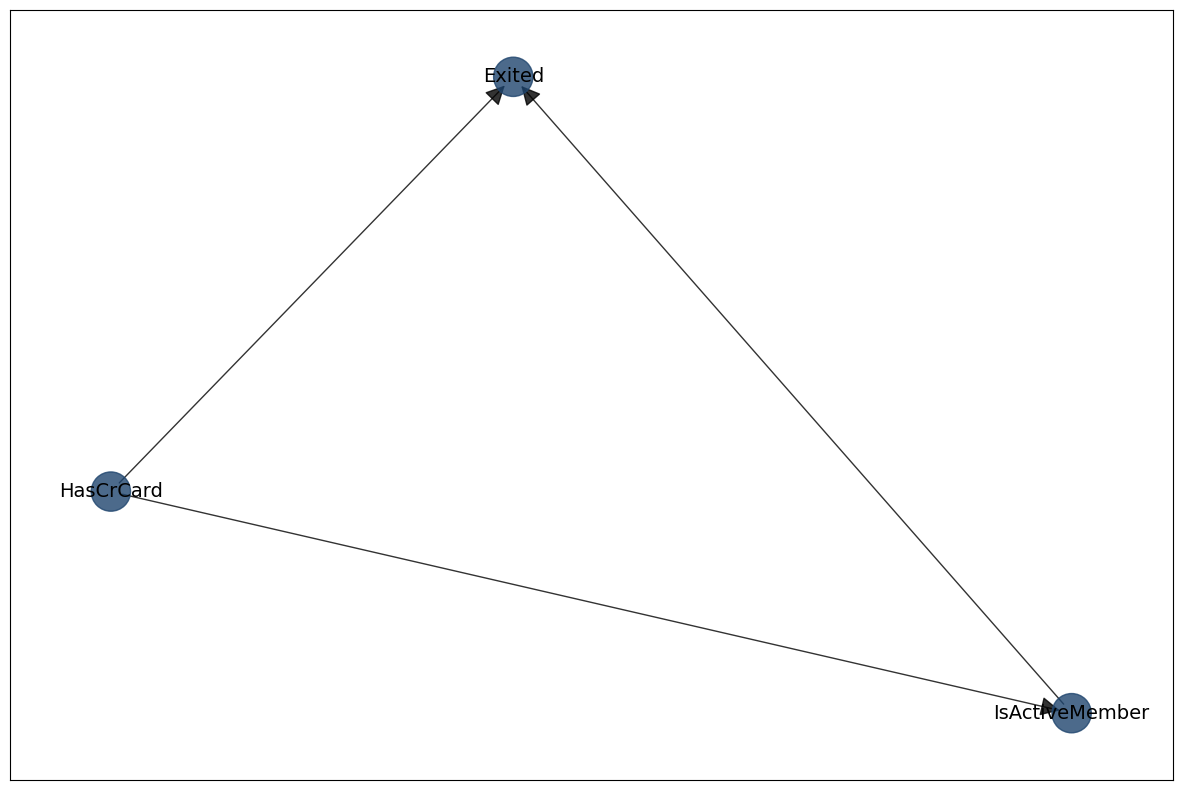

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'HasCrCard': array([-0.46253764, -0.18374623]),
  'IsActiveMember': array([ 0.51546314, -0.81625377]),
  'Exited': array([-0.05292551,  1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x25bc3b80190>,
 'node_properties': {'HasCrCard': {'node_color': '#1f456e', 'node_size': 800},
  'IsActiveMember': {'node_color': '#1f456e', 'node_size': 800},
  'Exited': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('HasCrCard', 'IsActiveMember'): {'color': '#000000',
   'weight': 1},
  ('HasCrCard', 'Exited'): {'color': '#000000', 'weight': 1},
  ('IsActiveMember', 'Exited'): {'color': '#000000', 'weight': 1}}}

In [81]:
# Visualise
DAG = bn.make_DAG(exp_edges)
bn.plot(DAG)

In [82]:
# Credit card isn't affected by activity or exited
cpt_cc = TabularCPD(variable='HasCrCard',
                        variable_card=2,
                        values=[[0.3], [0.7]])
print(cpt_cc)

+--------------+-----+
| HasCrCard(0) | 0.3 |
+--------------+-----+
| HasCrCard(1) | 0.7 |
+--------------+-----+


In [83]:
# Activity influenced by credit card
cpt_active = TabularCPD(variable='IsActiveMember', variable_card=2,
                        values=[[0.8, 0.2],
                                [0.2, 0.8]],
                        evidence=['HasCrCard'], evidence_card=[2])
print(cpt_active)

+-------------------+--------------+--------------+
| HasCrCard         | HasCrCard(0) | HasCrCard(1) |
+-------------------+--------------+--------------+
| IsActiveMember(0) | 0.8          | 0.2          |
+-------------------+--------------+--------------+
| IsActiveMember(1) | 0.2          | 0.8          |
+-------------------+--------------+--------------+


In [84]:
# Exited influenced by both
cpt_exited = TabularCPD(variable='Exited', variable_card=2,
                           values=[[0.8, 0.7, 0.9, 0.95],
                                   [0.2, 0.3, 0.1, 0.05]],
                           evidence=['IsActiveMember', 'HasCrCard'],
                           evidence_card=[2, 2])

In [86]:
# Make DAG
prior_model = bn.make_DAG(DAG, CPD=[cpt_cc, cpt_active, cpt_exited])

[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: HasCrCard
[bnlearn] >Add CPD: IsActiveMember
[bnlearn] >Add CPD: Exited
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


In [87]:
bn.print_CPD(prior_model)

[bnlearn] >Data is stored in [query.df]
+----+-------------+-----+
|    |   HasCrCard |   p |
+====+=============+=====+
|  0 |           0 | 0.3 |
+----+-------------+-----+
|  1 |           1 | 0.7 |
+----+-------------+-----+
CPD of HasCrCard:
+--------------+-----+
| HasCrCard(0) | 0.3 |
+--------------+-----+
| HasCrCard(1) | 0.7 |
+--------------+-----+
[bnlearn] >Data is stored in [query.df]
+----+------------------+-------------+-----+
|    |   IsActiveMember |   HasCrCard |   p |
+====+==================+=============+=====+
|  0 |                0 |           0 | 0.8 |
+----+------------------+-------------+-----+
|  1 |                0 |           1 | 0.2 |
+----+------------------+-------------+-----+
|  2 |                1 |           0 | 0.2 |
+----+------------------+-------------+-----+
|  3 |                1 |           1 | 0.8 |
+----+------------------+-------------+-----+
CPD of IsActiveMember:
+-------------------+--------------+--------------+
| HasCrCard      

{'HasCrCard':    HasCrCard    p
 0          0  0.3
 1          1  0.7,
 'IsActiveMember':    IsActiveMember  HasCrCard    p
 0               0          0  0.8
 1               0          1  0.2
 2               1          0  0.2
 3               1          1  0.8,
 'Exited':    Exited  IsActiveMember  HasCrCard     p
 0       0               0          0  0.80
 1       0               0          1  0.70
 2       0               1          0  0.90
 3       0               1          1  0.95
 4       1               0          0  0.20
 5       1               0          1  0.30
 6       1               1          0  0.10
 7       1               1          1  0.05}

In [88]:
df_exp = df[['HasCrCard',
             'IsActiveMember',
             'Exited']]

In [90]:
# Use these as priors
post_model = bn.parameter_learning.fit(model=prior_model,
                                       df=df_exp,
                                       methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of HasCrCard:
+--------------+----------+
| HasCrCard(0) | 0.313182 |
+--------------+----------+
| HasCrCard(1) | 0.686818 |
+--------------+----------+
[bnlearn] >CPD of IsActiveMember:
+-------------------+---------------------+--------------------+
| HasCrCard         | HasCrCard(0)        | HasCrCard(1)       |
+-------------------+---------------------+--------------------+
| IsActiveMember(0) | 0.47924528301886793 | 0.4894771674387823 |
+-------------------+---------------------+--------------------+
| IsActiveMember(1) | 0.5207547169811321  | 0.5105228325612178 |
+-------------------+---------------------+--------------------+
[bnlearn] >CPD of Exited:
+----------------+-----+---------------------+
| HasCrCard      | ... | HasCrCard(1)        |
+----------------+-----+---------------------+
| IsActiveMember | ... | IsActiveMember(1)   |
+----------------+-----+---------------------+
| Exited(0)    

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [HasCrCard <-> IsActiveMember] [P=0.244175] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [HasCrCard <-> Exited] [P=0.492372] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


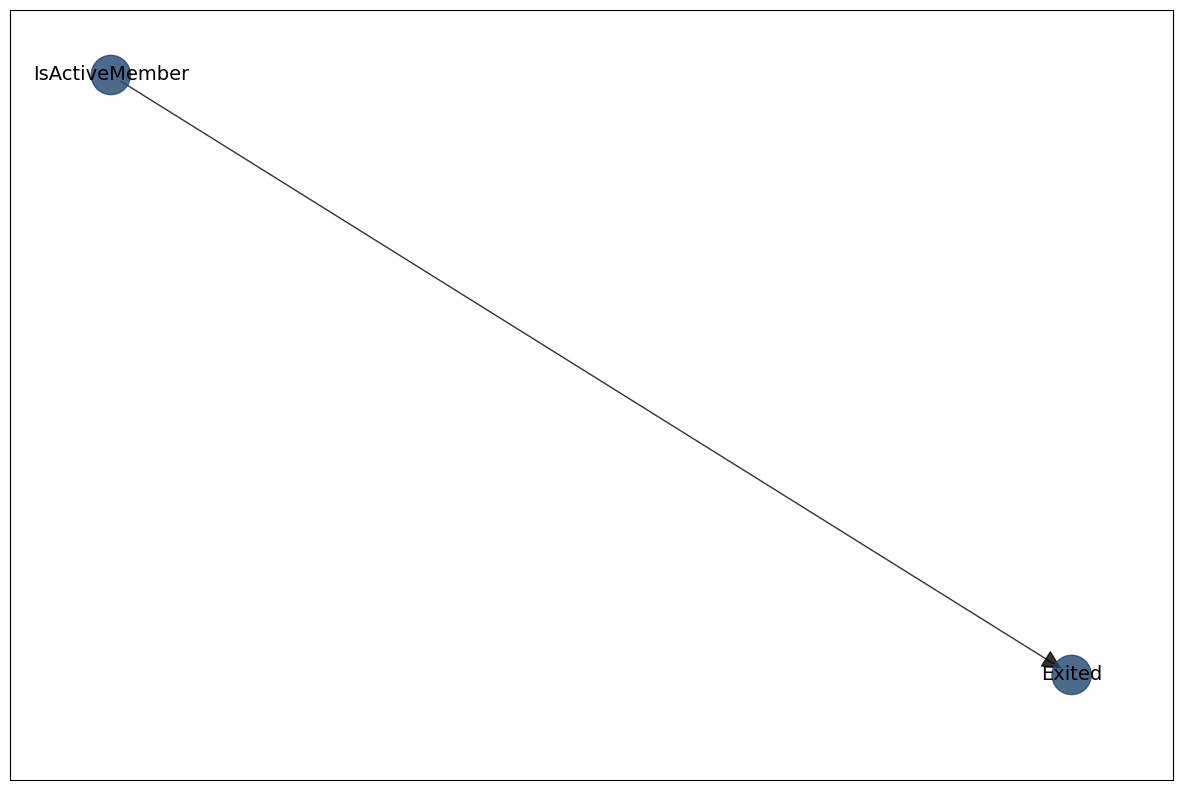

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'HasCrCard': array([ 0.0919244, -1.       ]),
  'IsActiveMember': array([-0.22617515,  0.52302382]),
  'Exited': array([0.13425075, 0.47697618])},
 'G': <networkx.classes.digraph.DiGraph at 0x25bc3faa510>,
 'node_properties': {'HasCrCard': {'node_color': '#1f456e', 'node_size': 800},
  'IsActiveMember': {'node_color': '#1f456e', 'node_size': 800},
  'Exited': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('IsActiveMember', 'Exited'): {'color': '#000000',
   'weight': 1.0}}}

In [92]:
# Independence test
model = bn.independence_test(post_model, df, prune=True)

# Make plot
bn.plot(model)

Turns out having a credit card doesn't make a difference!